Лабораторная работа №2

## Логистическая и линейная регрессия

## 2. Создание бейзлайна и оценка качества

Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, mean_squared_error, mean_absolute_error, r2_score, 
    classification_report, precision_recall_curve, auc
)
import warnings
warnings.filterwarnings('ignore')

Загрузка данных

In [2]:
# Загрузка данных
df_water = pd.read_csv('water_potability.csv', na_values=['', '?', 'N/A', 'NA', 'None', ' ', '-'], index_col=0)
df_concrete = pd.read_csv('concrete.csv', na_values=['', '?', 'N/A', 'NA', 'None', ' ', '-'])

print(f"Размер данных (вода): {df_water.shape}")
print(f"Размер данных (бетон): {df_concrete.shape}")

Размер данных (вода): (3276, 10)
Размер данных (бетон): (1030, 9)


### 2a. Подготовка данных и обучение baseline моделей

In [3]:
# удаление пропусков для простого baseline
df_water_clean = df_water.dropna()
df_concrete_clean = df_concrete.dropna()

# разделение на признаки и целевую переменную
X_water = df_water_clean.drop('Potability', axis=1)
y_water = df_water_clean['Potability']

X_concrete = df_concrete_clean.iloc[:, :-1]
y_concrete = df_concrete_clean.iloc[:, -1]

# разделение на обучающую и тестовую выборки
X_train_water, X_test_water, y_train_water, y_test_water = train_test_split(
    X_water, y_water, test_size=0.3, random_state=42
)

X_train_concrete, X_test_concrete, y_train_concrete, y_test_concrete = train_test_split(
    X_concrete, y_concrete, test_size=0.3, random_state=42
)

print(f"Классификация - тренировочная: {X_train_water.shape}, тестовая: {X_test_water.shape}")
print(f"Регрессия - тренировочная: {X_train_concrete.shape}, тестовая: {X_test_concrete.shape}")

Классификация - тренировочная: (1407, 9), тестовая: (604, 9)
Регрессия - тренировочная: (721, 8), тестовая: (309, 8)


Обучим модели регрессии без качественной предобработки данных. Удалим только пропуски, чтобы модель не выдавала ошибку.

In [4]:
# обуение логистической регрессии для классификации
lr_clf_baseline = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')
lr_clf_baseline.fit(X_train_water, y_train_water)
y_pred_water_baseline = lr_clf_baseline.predict(X_test_water)
y_pred_proba_water_baseline = lr_clf_baseline.predict_proba(X_test_water)[:, 1]

# обучение линейной регрессии
lin_reg_baseline = LinearRegression()
lin_reg_baseline.fit(X_train_concrete, y_train_concrete)
y_pred_concrete_baseline = lin_reg_baseline.predict(X_test_concrete)


### 2b. Оценка качества моделей

Выведим и проанализируем метрики для модели классфикации.

Метрики качества (Логистическая регрессия - baseline):
  Accuracy:  0.4603
  Precision: 0.3785
  Recall:    0.4819
  F1-score:  0.4240
  ROC-AUC:   0.4868
  PR-AUC:    0.4505

Матрица ошибок:


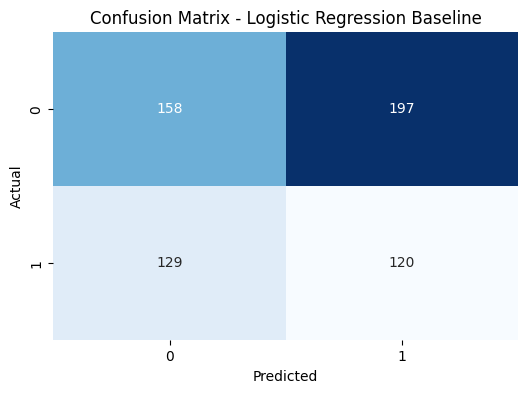


Отчет о классификации:
              precision    recall  f1-score   support

           0       0.55      0.45      0.49       355
           1       0.38      0.48      0.42       249

    accuracy                           0.46       604
   macro avg       0.46      0.46      0.46       604
weighted avg       0.48      0.46      0.46       604



In [5]:
accuracy = accuracy_score(y_test_water, y_pred_water_baseline)
precision = precision_score(y_test_water, y_pred_water_baseline, zero_division=0)
recall = recall_score(y_test_water, y_pred_water_baseline, zero_division=0)
f1 = f1_score(y_test_water, y_pred_water_baseline, zero_division=0)
roc_auc = roc_auc_score(y_test_water, y_pred_proba_water_baseline)
pr_curve = precision_recall_curve(y_test_water, y_pred_proba_water_baseline)
pr_auc = auc(pr_curve[1], pr_curve[0])
cm = confusion_matrix(y_test_water, y_pred_water_baseline)

print(f"Метрики качества (Логистическая регрессия - baseline):")
print(f"  Accuracy:  {accuracy:.4f}")
print(f"  Precision: {precision:.4f}")
print(f"  Recall:    {recall:.4f}")
print(f"  F1-score:  {f1:.4f}")
print(f"  ROC-AUC:   {roc_auc:.4f}")
print(f"  PR-AUC:    {pr_auc:.4f}")

print(f"\nМатрица ошибок:")
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Logistic Regression Baseline')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(f"\nОтчет о классификации:")
print(classification_report(y_test_water, y_pred_water_baseline))

*Получили достаточно низкие значения метрик для модели классификации. Метрики выше, чем у модели KNN с аналогичной предобработкой данных. Пока модель сильно ошибается при классификации пригодной воды.*

#### Оценка качества модели линейной регрессии

In [6]:
mse = mean_squared_error(y_test_concrete, y_pred_concrete_baseline)
mae = mean_absolute_error(y_test_concrete, y_pred_concrete_baseline)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_concrete, y_pred_concrete_baseline)

print(f"Метрики качества (Линейная регрессия - baseline):")
print(f"  MSE:  {mse:.4f}")
print(f"  MAE:  {mae:.4f}")
print(f"  RMSE: {rmse:.4f}")
print(f"  R²:   {r2:.4f}")

Метрики качества (Линейная регрессия - baseline):
  MSE:  109.7508
  MAE:  8.2986
  RMSE: 10.4762
  R²:   0.5944


*Пока метрики сильно хуже, чем у KNN. Модель дает ошибку предсказания. MSE достаточно высокий.*

#### Визуализация результатов baseline подхода

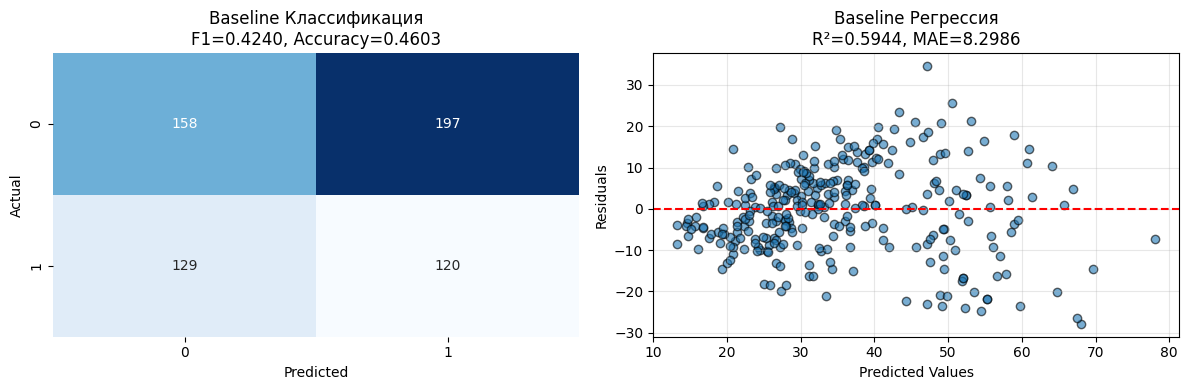

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# матрица ошибок для классификации
cm_baseline_clf = confusion_matrix(y_test_water, y_pred_water_baseline)
sns.heatmap(cm_baseline_clf, annot=True, fmt='d', ax=axes[0], cmap='Blues', cbar=False)
axes[0].set_title(f'Baseline Классификация\nF1={f1:.4f}, Accuracy={accuracy:.4f}')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# график остатков для регрессии
residuals_baseline_reg = y_test_concrete - y_pred_concrete_baseline
axes[1].scatter(y_pred_concrete_baseline, residuals_baseline_reg, alpha=0.6, edgecolors='k')
axes[1].axhline(y=0, color='r', linestyle='--')
axes[1].set_title(f'Baseline Регрессия\nR²={r2:.4f}, MAE={mae:.4f}')
axes[1].set_xlabel('Predicted Values')
axes[1].set_ylabel('Residuals')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 3. Улучшение бейзлайна

### 3a. Формулирование гипотез улучшения

**Гипотеза 1:** Заполнение пропусков медианой улучшит качество моделей

**Гипотеза 2:** Стандартизация признаков улучшит качество моделей (важно для логистической и линейной регрессии)

**Гипотеза 3:** Подбор оптимального параметра регуляризации C для логистической регрессии улучшит результаты

**Гипотеза 4:** Удаление выбросов методом IQR улучшит качество модели, особенно для регрессии

**Гипотеза 5:** Создание новых признаков

### 3b. Проверка гипотез

#### Гипотеза 1: Заполнение пропусков медианой

Классификация (с заполнением пропусков):
  Accuracy:  0.5249
  F1-score:  0.4339
  ROC-AUC:   0.5302
  PR-AUC:    0.4331

Матрица ошибок:

Отчет о классификации:
              precision    recall  f1-score   support

           0       0.64      0.55      0.59       617
           1       0.39      0.49      0.43       366

    accuracy                           0.52       983
   macro avg       0.52      0.52      0.51       983
weighted avg       0.55      0.52      0.53       983

Метрики качества (Логистическая регрессия - baseline):
  Accuracy:  0.4603
  Precision: 0.3785
  Recall:    0.4819
  F1-score:  0.4240
  ROC-AUC:   0.4868
  PR-AUC:    0.4505


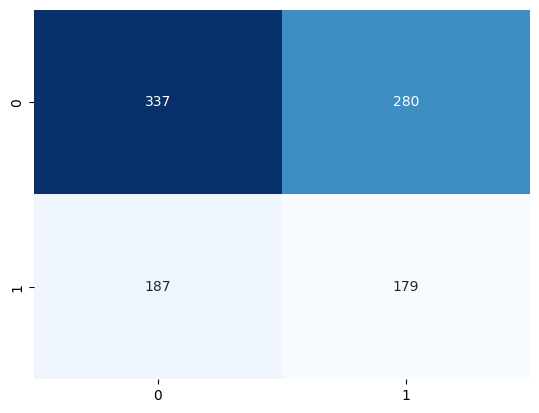

In [8]:
# загрузка данных заново
df_water_hyp1 = pd.read_csv('water_potability.csv', na_values=['', '?', 'N/A', 'NA', 'None', ' ', '-'], index_col=0)

# заполнение пропусков медианой по классам для классификации
df_water_hyp1['ph'] = df_water_hyp1.groupby('Potability')['ph'].transform(lambda x: x.fillna(x.median()))
df_water_hyp1['Sulfate'] = df_water_hyp1.groupby('Potability')['Sulfate'].transform(lambda x: x.fillna(x.median()))
df_water_hyp1['Trihalomethanes'] = df_water_hyp1.groupby('Potability')['Trihalomethanes'].transform(lambda x: x.fillna(x.median()))

# разделение на признаки и целевую переменную
X_water_hyp1 = df_water_hyp1.drop('Potability', axis=1)
y_water_hyp1 = df_water_hyp1['Potability']

# разделение на train/test
X_train_water_h1, X_test_water_h1, y_train_water_h1, y_test_water_h1 = train_test_split(
    X_water_hyp1, y_water_hyp1, test_size=0.3, random_state=42
)

# обучение модели
# добавим балансировку классов для классификации
lr_clf_hyp1 = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')
lr_clf_hyp1.fit(X_train_water_h1, y_train_water_h1)
y_pred_water_h1 = lr_clf_hyp1.predict(X_test_water_h1)
y_pred_proba_water_h1 = lr_clf_hyp1.predict_proba(X_test_water_h1)[:, 1]

# метрики для классификации
acc_h1 = accuracy_score(y_test_water_h1, y_pred_water_h1)
f1_h1 = f1_score(y_test_water_h1, y_pred_water_h1, zero_division=0)
roc_auc_h1 = roc_auc_score(y_test_water_h1, y_pred_proba_water_h1)
pr_curve_h1 = precision_recall_curve(y_test_water_h1, y_pred_proba_water_h1)
pr_auc_h1 = auc(pr_curve_h1[1], pr_curve_h1[0])

cm_hyp1 = confusion_matrix(y_test_water_h1, y_pred_water_h1)

print(f"Классификация (с заполнением пропусков):")
print(f"  Accuracy:  {acc_h1:.4f}")
print(f"  F1-score:  {f1_h1:.4f}")
print(f"  ROC-AUC:   {roc_auc_h1:.4f}")
print(f"  PR-AUC:    {pr_auc_h1:.4f}")

print(f"\nМатрица ошибок:")
sns.heatmap(cm_hyp1, annot=True, fmt='d', cmap='Blues', cbar=False)
print(f"\nОтчет о классификации:")
print(classification_report(y_test_water_h1, y_pred_water_h1))


print(f"Метрики качества (Логистическая регрессия - baseline):")
print(f"  Accuracy:  {accuracy:.4f}")
print(f"  Precision: {precision:.4f}")
print(f"  Recall:    {recall:.4f}")
print(f"  F1-score:  {f1:.4f}")
print(f"  ROC-AUC:   {roc_auc:.4f}")
print(f"  PR-AUC:    {pr_auc:.4f}")

*PR-AUC сдала на несколько сотых лучше и accuracy тоже немного улучшилась. Но пока не значительно.*

In [9]:
df_concrete_hyp1 = pd.read_csv('concrete.csv', na_values=['', '?', 'N/A', 'NA', 'None', ' ', '-'])
# заполнение пропусков для регрессии
df_concrete_hyp1 = df_concrete_hyp1.fillna(df_concrete_hyp1.median())

# отделяем признаки и целевую переменную
X_concrete_hyp1 = df_concrete_hyp1.iloc[:, :-1]
y_concrete_hyp1 = df_concrete_hyp1.iloc[:, -1]

# разделение на train/test
X_train_concrete_h1, X_test_concrete_h1, y_train_concrete_h1, y_test_concrete_h1 = train_test_split(
    X_concrete_hyp1, y_concrete_hyp1, test_size=0.3, random_state=42
)

# обучение модели линейной регрессии
lin_reg_hyp1 = LinearRegression()
lin_reg_hyp1.fit(X_train_concrete_h1, y_train_concrete_h1)
y_pred_concrete_h1 = lin_reg_hyp1.predict(X_test_concrete_h1)


# Метрики для регрессии
mae_h1 = mean_absolute_error(y_test_concrete_h1, y_pred_concrete_h1)
r2_h1 = r2_score(y_test_concrete_h1, y_pred_concrete_h1)
mse_h1 = mean_squared_error(y_test_concrete_h1, y_pred_concrete_h1)

print(f"\nРегрессия (с заполнением пропусков):")
print(f"  MAE:  {mae_h1:.4f}")
print(f"  R²:   {r2_h1:.4f}")
print(f"  MSE:  {mse_h1:.4f}")

print(f"Метрики качества (Линейная регрессия - baseline):")
print(f"  MSE:  {mse:.4f}")
print(f"  MAE:  {mae:.4f}")
print(f"  RMSE: {rmse:.4f}")
print(f"  R²:   {r2:.4f}")


Регрессия (с заполнением пропусков):
  MAE:  8.2986
  R²:   0.5944
  MSE:  109.7508
Метрики качества (Линейная регрессия - baseline):
  MSE:  109.7508
  MAE:  8.2986
  RMSE: 10.4762
  R²:   0.5944


*Замена пропусков никак не повлияла на качество модели регрессии.*

#### Гипотеза 2: Стандартизация признаков

БЕЗ стандартизации: Accuracy=0.5249, F1=0.4339, ROC-AUC=0.5302, PR-AUC=0.4331
СО стандартизацией:  Accuracy=0.5198, F1=0.4434, ROC-AUC=0.5251, PR-AUC=0.4103

Регрессия БЕЗ стандартизации: MAE=8.2986, R²=0.5944, MSE=109.7508
Регрессия СО стандартизацией:  MAE=8.2986, R²=0.5944, MSE=109.7508


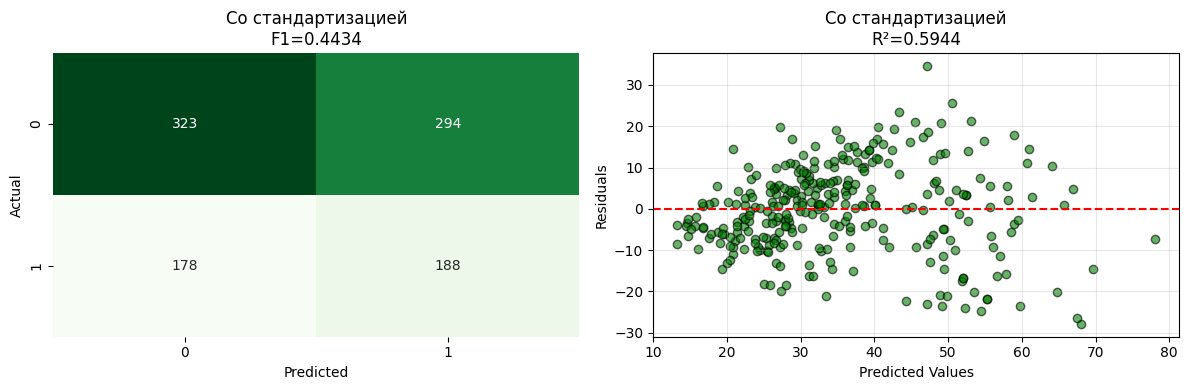

In [10]:
print(f"БЕЗ стандартизации: Accuracy={acc_h1:.4f}, F1={f1_h1:.4f}, ROC-AUC={roc_auc_h1:.4f}, PR-AUC={pr_auc_h1:.4f}")

# применяем стандартизацию
scaler_water_h2 = StandardScaler()
X_train_water_h2 = scaler_water_h2.fit_transform(X_train_water_h1)
X_test_water_h2 = scaler_water_h2.transform(X_test_water_h1)

scaler_concrete_h2 = StandardScaler()
X_train_concrete_h2 = scaler_concrete_h2.fit_transform(X_train_concrete_h1)
X_test_concrete_h2 = scaler_concrete_h2.transform(X_test_concrete_h1)

# обучение моделей со стандартизацией
lr_clf_hyp2 = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')
lr_clf_hyp2.fit(X_train_water_h2, y_train_water_h1)
y_pred_water_h2 = lr_clf_hyp2.predict(X_test_water_h2)
y_pred_proba_water_h2 = lr_clf_hyp2.predict_proba(X_test_water_h2)[:, 1]

lin_reg_hyp2 = LinearRegression()
lin_reg_hyp2.fit(X_train_concrete_h2, y_train_concrete_h1)
y_pred_concrete_h2 = lin_reg_hyp2.predict(X_test_concrete_h2)

# метрики для классификации
acc_h2 = accuracy_score(y_test_water_h1, y_pred_water_h2)
f1_h2 = f1_score(y_test_water_h1, y_pred_water_h2, zero_division=0)
roc_auc_h2 = roc_auc_score(y_test_water_h1, y_pred_proba_water_h2)
pr_curve_h2 = precision_recall_curve(y_test_water_h1, y_pred_proba_water_h2)
pr_auc_h2 = auc(pr_curve_h2[1], pr_curve_h2[0])

# метрики для регрессии
mae_h2 = mean_absolute_error(y_test_concrete_h1, y_pred_concrete_h2)
r2_h2 = r2_score(y_test_concrete_h1, y_pred_concrete_h2)
mse_h2 = mean_squared_error(y_test_concrete_h1, y_pred_concrete_h2)

print(f"СО стандартизацией:  Accuracy={acc_h2:.4f}, F1={f1_h2:.4f}, ROC-AUC={roc_auc_h2:.4f}, PR-AUC={pr_auc_h2:.4f}")

print(f"\nРегрессия БЕЗ стандартизации: MAE={mae_h1:.4f}, R²={r2_h1:.4f}, MSE={mse_h1:.4f}")
print(f"Регрессия СО стандартизацией:  MAE={mae_h2:.4f}, R²={r2_h2:.4f}, MSE={mse_h2:.4f}")

# визуализация
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# матрица ошибок для классификации
cm_h2 = confusion_matrix(y_test_water_h1, y_pred_water_h2)
sns.heatmap(cm_h2, annot=True, fmt='d', ax=axes[0], cmap='Greens', cbar=False)
axes[0].set_title(f'Со стандартизацией\nF1={f1_h2:.4f}')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# график остатков для регрессии
residuals_h2 = y_test_concrete_h1 - y_pred_concrete_h2
axes[1].scatter(y_pred_concrete_h2, residuals_h2, alpha=0.6, edgecolors='k', color='green')
axes[1].axhline(y=0, color='r', linestyle='--')
axes[1].set_title(f'Со стандартизацией\nR²={r2_h2:.4f}')
axes[1].set_xlabel('Predicted Values')
axes[1].set_ylabel('Residuals')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

*Масшабировние (стандартизация) --- не дало улучшений качества моделей.*

#### Гипотеза 3: Подбор параметра регуляризации C

Оптимальное C: 1, CV F1-score: 0.4433
C=1.0 (по умолчанию): Accuracy=0.5198, F1=0.4434, ROC-AUC=0.5251
C=1 (оптимальное): Accuracy=0.5198, F1=0.4434, ROC-AUC=0.5251


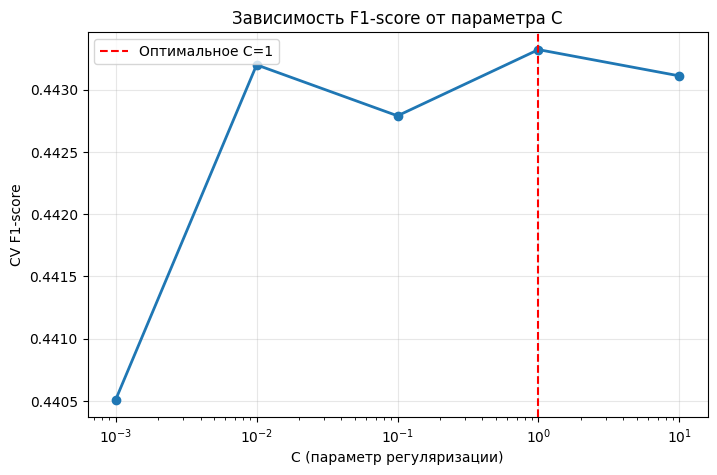

In [11]:
# подбор оптимального параметра C для логистической регрессии
C_values = [0.001, 0.01, 0.1, 1, 10]
cv_scores_clf = []

for C in C_values:
    lr = LogisticRegression(C=C, random_state=42, max_iter=1000, class_weight='balanced')
    scores = cross_val_score(lr, X_train_water_h2, y_train_water_h1, cv=5, scoring='f1')
    cv_scores_clf.append(scores.mean())

best_C = C_values[np.argmax(cv_scores_clf)]
best_cv_score = max(cv_scores_clf)

print(f"Оптимальное C: {best_C}, CV F1-score: {best_cv_score:.4f}")

# обучение с оптимальным C
lr_clf_hyp3 = LogisticRegression(C=best_C, random_state=42, max_iter=1000, class_weight='balanced')
lr_clf_hyp3.fit(X_train_water_h2, y_train_water_h1)
y_pred_water_h3 = lr_clf_hyp3.predict(X_test_water_h2)
y_pred_proba_water_h3 = lr_clf_hyp3.predict_proba(X_test_water_h2)[:, 1]

acc_h3 = accuracy_score(y_test_water_h1, y_pred_water_h3)
f1_h3 = f1_score(y_test_water_h1, y_pred_water_h3, zero_division=0)
roc_auc_h3 = roc_auc_score(y_test_water_h1, y_pred_proba_water_h3)
pr_curve_h3 = precision_recall_curve(y_test_water_h1, y_pred_proba_water_h3)
pr_auc_h3 = auc(pr_curve_h3[1], pr_curve_h3[0])

print(f"C=1.0 (по умолчанию): Accuracy={acc_h2:.4f}, F1={f1_h2:.4f}, ROC-AUC={roc_auc_h2:.4f}")
print(f"C={best_C} (оптимальное): Accuracy={acc_h3:.4f}, F1={f1_h3:.4f}, ROC-AUC={roc_auc_h3:.4f}")

# График зависимости F1 от C
plt.figure(figsize=(8, 5))
plt.plot(C_values, cv_scores_clf, marker='o', linewidth=2, markersize=6)
plt.xscale('log')
plt.axvline(x=best_C, color='r', linestyle='--', label=f'Оптимальное C={best_C}')
plt.xlabel('C (параметр регуляризации)')
plt.ylabel('CV F1-score')
plt.title('Зависимость F1-score от параметра C')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

*Подбор гиперпараметра C не дал улучшений качества модели. Значение параметра осталось равным 1.0 как и в библиотеке по умолчанию.*

#### Гипотеза 4: Удаление выбросов методом IQR

Регрессия - до удаления выбросов: (721, 8)
Регрессия - после удаления выбросов: (660, 8)

Регрессия БЕЗ удаления выбросов: MAE=8.2986, R²=0.5944, MSE=109.7508
Регрессия С удалением выбросов:  MAE=9.7056, R²=-0.1150, MSE=301.7036


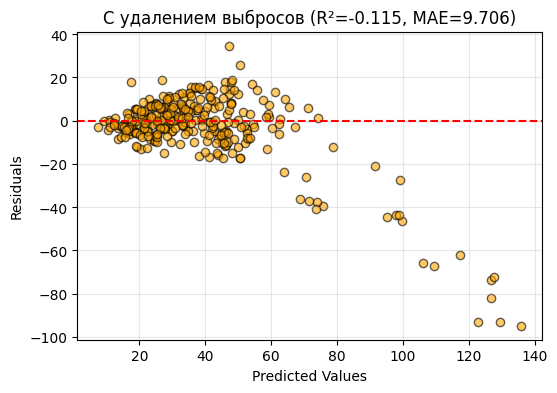

In [12]:
def remove_outliers_iqr(X: pd.DataFrame, y: pd.Series = None, factor: float = 1.5):
    """ Удаляет строки, где хоть в одном числовом признаке значение выходит за пределы [Q1 - factor*IQR, Q3 + factor*IQR]. """
    numeric = X.select_dtypes(include=[np.number])
    Q1 = numeric.quantile(0.25)
    Q3 = numeric.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - factor * IQR
    upper = Q3 + factor * IQR
    mask = ((numeric >= lower) & (numeric <= upper)).all(axis=1)
    X_clean = X.loc[mask].copy()
    if y is None:
        return X_clean, mask
    return X_clean, y.loc[mask].copy(), mask

# удаление выбросов для регрессии
X_train_concrete_h4, y_train_concrete_h4, mask_c = remove_outliers_iqr(
    pd.DataFrame(X_train_concrete_h2, columns=X_concrete_hyp1.columns), 
    pd.Series(y_train_concrete_h1.values, index=range(len(y_train_concrete_h1))), 
    factor=1.5
)

print(f"Регрессия - до удаления выбросов: {X_train_concrete_h2.shape}")
print(f"Регрессия - после удаления выбросов: {X_train_concrete_h4.shape}")

# обучение модели регрессии после удаления выбросов
lin_reg_hyp4 = LinearRegression()
lin_reg_hyp4.fit(X_train_concrete_h4, y_train_concrete_h4)
y_pred_concrete_h4 = lin_reg_hyp4.predict(X_test_concrete_h2)

mae_h4 = mean_absolute_error(y_test_concrete_h1, y_pred_concrete_h4)
r2_h4 = r2_score(y_test_concrete_h1, y_pred_concrete_h4)
mse_h4 = mean_squared_error(y_test_concrete_h1, y_pred_concrete_h4)

print(f"\nРегрессия БЕЗ удаления выбросов: MAE={mae_h2:.4f}, R²={r2_h2:.4f}, MSE={mse_h2:.4f}")
print(f"Регрессия С удалением выбросов:  MAE={mae_h4:.4f}, R²={r2_h4:.4f}, MSE={mse_h4:.4f}")

# Визуализация
plt.figure(figsize=(6, 4))
residuals_h4 = y_test_concrete_h1 - y_pred_concrete_h4
plt.scatter(y_pred_concrete_h4, residuals_h4, alpha=0.6, edgecolors='k', color='orange')
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title(f'С удалением выбросов (R²={r2_h4:.3f}, MAE={mae_h4:.3f})')
plt.grid(alpha=0.3)
plt.show()

*Удаление выбросов только ухудшило качество модели регрессии. На графике заметен сильный разброс значений.*

Классификация - до удаления выбросов: (2293, 9)
Классификация - после удаления выбросов: (1856, 9)
Классификация (после удаления выбросов - логистическая регрессия):
  Accuracy:  0.5076
  F1-score:  0.4292
  ROC-AUC:   0.5097
  PR-AUC:    0.3806

Сравнение: до удаления (C=1) F1=0.4434, после удаления F1=0.4292
Сравнение: до удаления PR-AUC=0.4103, после удаления PR-AUC=0.3806


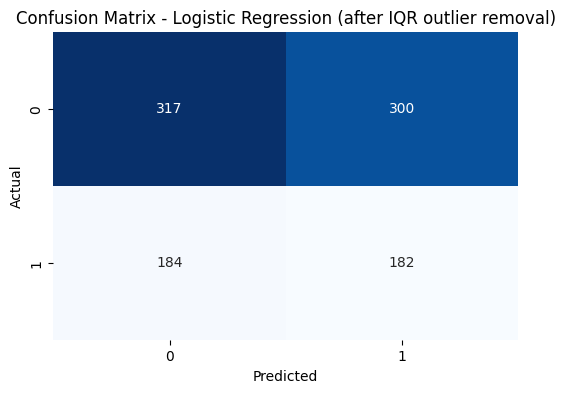

In [24]:
# преобразуем масштабированные трейновые признаки в DataFrame с корректными именами столбцов
df_train_water_scaled = pd.DataFrame(X_train_water_h2, columns=X_water_hyp1.columns)

# приводим y к индексу 0..n-1, чтобы совпадал с маской внутри remove_outliers_iqr
y_train_water_indexed = pd.Series(y_train_water_h1.values, index=range(len(y_train_water_h1)))

# удаляем выбросы методом IQR
X_train_water_h4, y_train_water_h4, mask_w = remove_outliers_iqr(df_train_water_scaled, y_train_water_indexed, factor=1.5)

print(f"Классификация - до удаления выбросов: {df_train_water_scaled.shape}")
print(f"Классификация - после удаления выбросов: {X_train_water_h4.shape}")

# обучение логистической регрессии на очищенных данных (используем оптимальное C из подбора)
lr_clf_hyp4 = LogisticRegression(C=best_C, random_state=42, max_iter=1000, class_weight='balanced')
lr_clf_hyp4.fit(X_train_water_h4.values, y_train_water_h4)

# оценка на тестовой выборке (масштабированной)
y_pred_water_h4 = lr_clf_hyp4.predict(X_test_water_h2)
y_pred_proba_water_h4 = lr_clf_hyp4.predict_proba(X_test_water_h2)[:, 1]

acc_h4 = accuracy_score(y_test_water_h1, y_pred_water_h4)
f1_h4 = f1_score(y_test_water_h1, y_pred_water_h4, zero_division=0)
roc_auc_h4 = roc_auc_score(y_test_water_h1, y_pred_proba_water_h4)
pr_curve_h4 = precision_recall_curve(y_test_water_h1, y_pred_proba_water_h4)
pr_auc_h4 = auc(pr_curve_h4[1], pr_curve_h4[0])

print("Классификация (после удаления выбросов - логистическая регрессия):")
print(f"  Accuracy:  {acc_h4:.4f}")
print(f"  F1-score:  {f1_h4:.4f}")
print(f"  ROC-AUC:   {roc_auc_h4:.4f}")
print(f"  PR-AUC:    {pr_auc_h4:.4f}")

# сравнение с предыдущими результатами (до удаления выбросов)
print(f"\nСравнение: до удаления (C={best_C}) F1={f1_h3:.4f}, после удаления F1={f1_h4:.4f}")
print(f"Сравнение: до удаления PR-AUC={pr_auc_h3:.4f}, после удаления PR-AUC={pr_auc_h4:.4f}")

# визуализация матрицы ошибок
cm_h4 = confusion_matrix(y_test_water_h1, y_pred_water_h4)
plt.figure(figsize=(6,4))
sns.heatmap(cm_h4, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Logistic Regression (after IQR outlier removal)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

*Удаление выбросов только ухудшило качество модели классификации.*

#### Гипотеза 5: Создание новых признаков

Создание новых признаков для задачи классифкации.

In [ ]:
# загрузим данные заново для инженерии признаков
df_water_fe = pd.read_csv('water_potability.csv', na_values=['', '?', 'N/A', 'NA', 'None', ' ', '-'], index_col=0)

# заполнение пропусков медианой по классам
df_water_fe['ph'] = df_water_fe.groupby('Potability')['ph'].transform(lambda x: x.fillna(x.median()))
df_water_fe['Sulfate'] = df_water_fe.groupby('Potability')['Sulfate'].transform(lambda x: x.fillna(x.median()))
df_water_fe['Trihalomethanes'] = df_water_fe.groupby('Potability')['Trihalomethanes'].transform(lambda x: x.fillna(x.median()))

# разделяем на признаки и целевую переменную
X_water_fe = df_water_fe.drop('Potability', axis=1)
y_water_fe = df_water_fe['Potability']

# создание новых признаков
X_water_fe_extended = X_water_fe.copy()

# 1. взаимодействие признаков
X_water_fe_extended['ph_sulfate'] = X_water_fe_extended['ph'] * X_water_fe_extended['Sulfate']
X_water_fe_extended['ph_turbidity'] = X_water_fe_extended['ph'] * X_water_fe_extended['Turbidity']
X_water_fe_extended['conductivity_sulfate'] = X_water_fe_extended['Conductivity'] * X_water_fe_extended['Sulfate']

# 2. полиномиальные признаки
X_water_fe_extended['ph_squared'] = X_water_fe_extended['ph'] ** 2
X_water_fe_extended['conductivity_squared'] = X_water_fe_extended['Conductivity'] ** 2
X_water_fe_extended['organic_carbon_squared'] = X_water_fe_extended['Organic_carbon'] ** 2

# 3. статистические признаки
X_water_fe_extended['feature_mean'] = X_water_fe_extended.mean(axis=1)
X_water_fe_extended['feature_std'] = X_water_fe_extended.std(axis=1)
X_water_fe_extended['feature_max'] = X_water_fe_extended.max(axis=1)
X_water_fe_extended['feature_min'] = X_water_fe_extended.min(axis=1)

# 4. отношения между признаками (безопасность - деление на ноль)
X_water_fe_extended['ph_conductivity_ratio'] = X_water_fe_extended['ph'] / (X_water_fe_extended['Conductivity'] + 1e-6)
X_water_fe_extended['sulfate_turbidity_ratio'] = X_water_fe_extended['Sulfate'] / (X_water_fe_extended['Turbidity'] + 1e-6)

print(f"Исходное количество признаков: {X_water_fe.shape[1]}")
print(f"Количество признаков после инженерии: {X_water_fe_extended.shape[1]}")
print(f"\nНовые признаки: {list(X_water_fe_extended.columns[X_water_fe.shape[1]:])}")


Исходное количество признаков: 9
Количество признаков после инженерии: 21

Новые признаки: ['ph_sulfate', 'ph_turbidity', 'conductivity_sulfate', 'ph_squared', 'conductivity_squared', 'organic_carbon_squared', 'feature_mean', 'feature_std', 'feature_max', 'feature_min', 'ph_conductivity_ratio', 'sulfate_turbidity_ratio']


Обучение модели с новыми признаками

In [41]:
# разделение на train/test с новыми признаками
X_train_water_fe, X_test_water_fe, y_train_water_fe, y_test_water_fe = train_test_split(
    X_water_fe_extended, y_water_fe, test_size=0.3, random_state=42
)

# стандартизация признаков
scaler_fe = StandardScaler()
X_train_water_fe_scaled = scaler_fe.fit_transform(X_train_water_fe)
X_test_water_fe_scaled = scaler_fe.transform(X_test_water_fe)

# обучение логистической регрессии с новыми признаками
lr_clf_fe = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')
lr_clf_fe.fit(X_train_water_fe_scaled, y_train_water_fe)
y_pred_water_fe = lr_clf_fe.predict(X_test_water_fe_scaled)
y_pred_proba_water_fe = lr_clf_fe.predict_proba(X_test_water_fe_scaled)[:, 1]

# вычисление метрик
acc_fe = accuracy_score(y_test_water_fe, y_pred_water_fe)
f1_fe = f1_score(y_test_water_fe, y_pred_water_fe, zero_division=0)
roc_auc_fe = roc_auc_score(y_test_water_fe, y_pred_proba_water_fe)
pr_curve_fe = precision_recall_curve(y_test_water_fe, y_pred_proba_water_fe)
pr_auc_fe = auc(pr_curve_fe[1], pr_curve_fe[0])
precision_fe = precision_score(y_test_water_fe, y_pred_water_fe, zero_division=0)
recall_fe = recall_score(y_test_water_fe, y_pred_water_fe, zero_division=0)

print(f"Метрики качества (с новыми признаками):")
print(f"  Accuracy:  {acc_fe:.4f}")
print(f"  Precision: {precision_fe:.4f}")
print(f"  Recall:    {recall_fe:.4f}")
print(f"  F1-score:  {f1_fe:.4f}")
print(f"  ROC-AUC:   {roc_auc_fe:.4f}")
print(f"  PR-AUC:    {pr_auc_fe:.4f}")

print(f"\nМетрики качества (baseline):")
print(f"  Accuracy:  {accuracy:.4f}")
print(f"  Precision: {precision:.4f}")
print(f"  Recall:    {recall:.4f}")
print(f"  F1-score:  {f1:.4f}")
print(f"  ROC-AUC:   {roc_auc:.4f}")
print(f"  PR-AUC:    {pr_auc:.4f}")


Метрики качества (с новыми признаками):
  Accuracy:  0.5646
  Precision: 0.4360
  Recall:    0.5765
  F1-score:  0.4965
  ROC-AUC:   0.6141
  PR-AUC:    0.4988

Метрики качества (baseline):
  Accuracy:  0.4603
  Precision: 0.3785
  Recall:    0.4819
  F1-score:  0.4240
  ROC-AUC:   0.4868
  PR-AUC:    0.4505


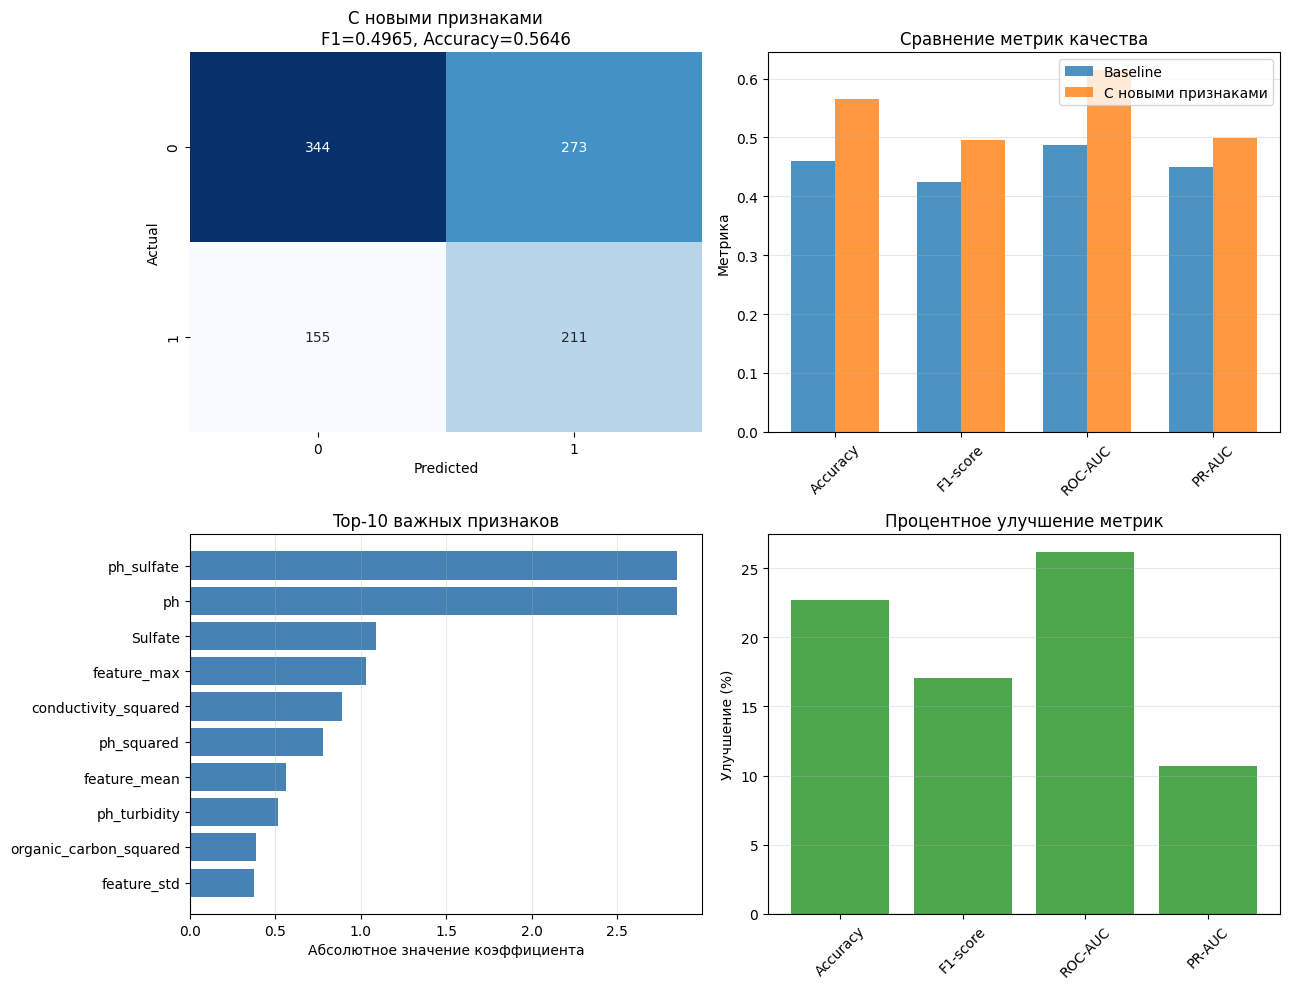

In [42]:
# Визуализация результатов инженерии признаков
fig, axes = plt.subplots(2, 2, figsize=(13, 10))

# 1. Матрица ошибок для модели с инженерией признаков
cm_fe = confusion_matrix(y_test_water_fe, y_pred_water_fe)
sns.heatmap(cm_fe, annot=True, fmt='d', ax=axes[0, 0], cmap='Blues', cbar=False)
axes[0, 0].set_title(f'С новыми признаками\nF1={f1_fe:.4f}, Accuracy={acc_fe:.4f}')
axes[0, 0].set_xlabel('Predicted')
axes[0, 0].set_ylabel('Actual')

# 2. Сравнение метрик
metrics_names = ['Accuracy', 'F1-score', 'ROC-AUC', 'PR-AUC']
baseline_metrics = [accuracy, f1, roc_auc, pr_auc]
fe_metrics = [acc_fe, f1_fe, roc_auc_fe, pr_auc_fe]

x = np.arange(len(metrics_names))
width = 0.35

axes[0, 1].bar(x - width/2, baseline_metrics, width, label='Baseline', alpha=0.8)
axes[0, 1].bar(x + width/2, fe_metrics, width, label='С новыми признаками', alpha=0.8)
axes[0, 1].set_ylabel('Метрика')
axes[0, 1].set_title('Сравнение метрик качества')
axes[0, 1].set_xticks(x)
axes[0, 1].set_xticklabels(metrics_names, rotation=45)
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3, axis='y')

# 3. Важность признаков (коэффициенты логистической регрессии)
feature_importance = np.abs(lr_clf_fe.coef_[0])
top_indices = np.argsort(feature_importance)[-10:]
top_features = [X_water_fe_extended.columns[i] for i in top_indices]
top_importance = feature_importance[top_indices]

axes[1, 0].barh(top_features, top_importance, color='steelblue')
axes[1, 0].set_xlabel('Абсолютное значение коэффициента')
axes[1, 0].set_title('Top-10 важных признаков')
axes[1, 0].grid(alpha=0.3, axis='x')

# 4. Увеличение метрик
improvement = [(fe_metrics[i] - baseline_metrics[i]) / baseline_metrics[i] * 100 
               for i in range(len(metrics_names))]
colors = ['green' if x > 0 else 'red' for x in improvement]
axes[1, 1].bar(metrics_names, improvement, color=colors, alpha=0.7)
axes[1, 1].axhline(y=0, color='black', linestyle='-', linewidth=0.8)
axes[1, 1].set_ylabel('Улучшение (%)')
axes[1, 1].set_title('Процентное улучшение метрик')
axes[1, 1].set_xticklabels(metrics_names, rotation=45)
axes[1, 1].grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


*Заметим, что по сравнению с baseline модель с новыми признаками показывает неплохое улучшение качества.*

Создание новых признаков для задачи линейной регрессии

In [40]:
# загрузим данные заново для инженерии признаков
df_concrete_fe = pd.read_csv('concrete.csv', na_values=['', '?', 'N/A', 'NA', 'None', ' ', '-'])

# заполнение пропусков для регрессии
df_concrete_fe = df_concrete_fe.fillna(df_concrete_fe.median())

# отделяем признаки и целевую переменную
X_concrete_fe = df_concrete_fe.iloc[:, :-1]
y_concrete_fe = df_concrete_fe.iloc[:, -1]

# создание новых признаков
X_concrete_fe_extended = X_concrete_fe.copy()

# 1. взаимодействие признаков (основные компоненты смеси)
X_concrete_fe_extended['cement_water'] = X_concrete_fe_extended['cement'] * X_concrete_fe_extended['water']
X_concrete_fe_extended['cement_slag'] = X_concrete_fe_extended['cement'] * X_concrete_fe_extended['slag']
X_concrete_fe_extended['cement_ash'] = X_concrete_fe_extended['cement'] * X_concrete_fe_extended['flyash']
X_concrete_fe_extended['slag_ash'] = X_concrete_fe_extended['slag'] * X_concrete_fe_extended['flyash']
X_concrete_fe_extended['water_superplasticizer'] = X_concrete_fe_extended['water'] * X_concrete_fe_extended['superplasticizer']
# 2. полиномиальные признаки
X_concrete_fe_extended['cement_squared'] = X_concrete_fe_extended['cement'] ** 2
X_concrete_fe_extended['water_squared'] = X_concrete_fe_extended['water'] ** 2
X_concrete_fe_extended['slag_squared'] = X_concrete_fe_extended['slag'] ** 2
X_concrete_fe_extended['age_squared'] = X_concrete_fe_extended['age'] ** 2
X_concrete_fe_extended['age_cubed'] = X_concrete_fe_extended['age'] ** 3

# 3. отношения между признаками
X_concrete_fe_extended['cement_water_ratio'] = X_concrete_fe_extended['cement'] / (X_concrete_fe_extended['water'] + 1e-6)
X_concrete_fe_extended['total_binders'] = (X_concrete_fe_extended['cement'] + 
                                            X_concrete_fe_extended['slag'] + 
                                            X_concrete_fe_extended['flyash'])
X_concrete_fe_extended['binder_water_ratio'] = X_concrete_fe_extended['total_binders'] / (X_concrete_fe_extended['water'] + 1e-6)

# 4. статистические признаки
X_concrete_fe_extended['component_mean'] = X_concrete_fe_extended[['cement', 'slag', 'flyash', 'water']].mean(axis=1)
X_concrete_fe_extended['component_max'] = X_concrete_fe_extended[['cement', 'slag', 'flyash', 'water']].max(axis=1)

print(f"Исходное количество признаков: {X_concrete_fe.shape[1]}")
print(f"Количество признаков после добавления: {X_concrete_fe_extended.shape[1]}")
print(f"\nНовые признаки: {list(X_concrete_fe_extended.columns[X_concrete_fe.shape[1]:])}")


Исходное количество признаков: 8
Количество признаков после добавления: 23

Новые признаки: ['cement_water', 'cement_slag', 'cement_ash', 'slag_ash', 'water_superplasticizer', 'cement_squared', 'water_squared', 'slag_squared', 'age_squared', 'age_cubed', 'cement_water_ratio', 'total_binders', 'binder_water_ratio', 'component_mean', 'component_max']


Обучение модели с новыми признаками

In [37]:
# разделение на train/test с новыми признаками
X_train_concrete_fe, X_test_concrete_fe, y_train_concrete_fe, y_test_concrete_fe = train_test_split(
    X_concrete_fe_extended, y_concrete_fe, test_size=0.3, random_state=42
)

# стандартизация признаков
scaler_concrete_fe = StandardScaler()
X_train_concrete_fe_scaled = scaler_concrete_fe.fit_transform(X_train_concrete_fe)
X_test_concrete_fe_scaled = scaler_concrete_fe.transform(X_test_concrete_fe)

# обучение линейной регрессии с новыми признаками
lin_reg_fe = LinearRegression()
lin_reg_fe.fit(X_train_concrete_fe_scaled, y_train_concrete_fe)
y_pred_concrete_fe = lin_reg_fe.predict(X_test_concrete_fe_scaled)

# вычисление метрик
mae_fe = mean_absolute_error(y_test_concrete_fe, y_pred_concrete_fe)
rmse_fe = np.sqrt(mean_squared_error(y_test_concrete_fe, y_pred_concrete_fe))
mse_fe = mean_squared_error(y_test_concrete_fe, y_pred_concrete_fe)
r2_fe = r2_score(y_test_concrete_fe, y_pred_concrete_fe)

print(f"Метрики качества (с новыми признаками):")
print(f"  MAE:   {mae_fe:.4f}")
print(f"  RMSE:  {rmse_fe:.4f}")
print(f"  MSE:   {mse_fe:.4f}")
print(f"  R²:    {r2_fe:.4f}")

print(f"\nМетрики качества (baseline):")
print(f"  MAE:   {mae:.4f}")
print(f"  RMSE:  {rmse:.4f}")
print(f"  MSE:   {mse:.4f}")
print(f"  R²:    {r2:.4f}")


Метрики качества (с новыми признаками):
  MAE:   5.7506
  RMSE:  7.6043
  MSE:   57.8247
  R²:    0.7863

Метрики качества (baseline):
  MAE:   8.2986
  RMSE:  10.4762
  MSE:   109.7508
  R²:    0.5944


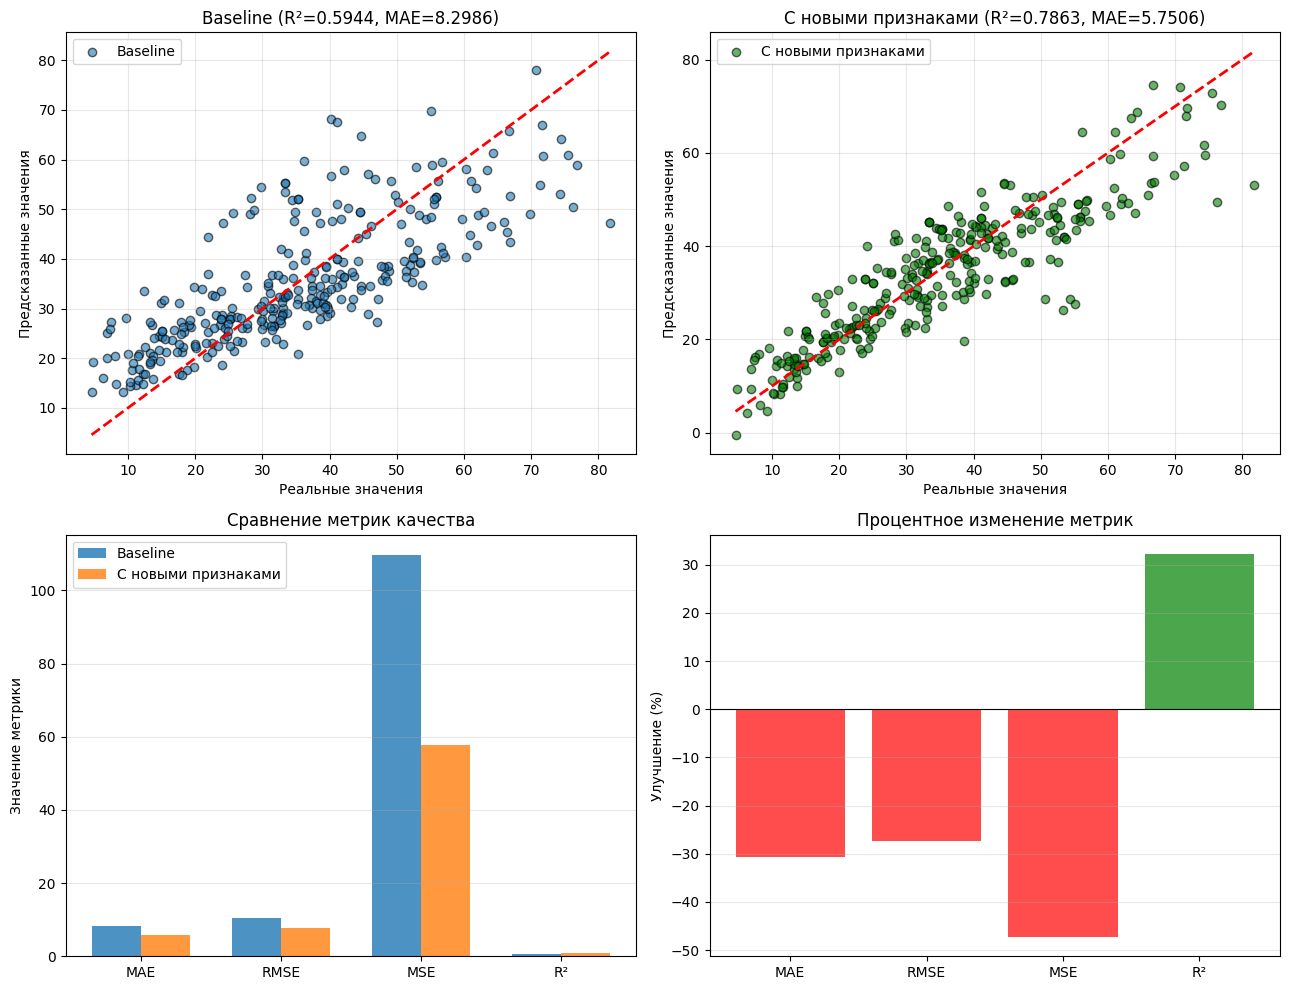

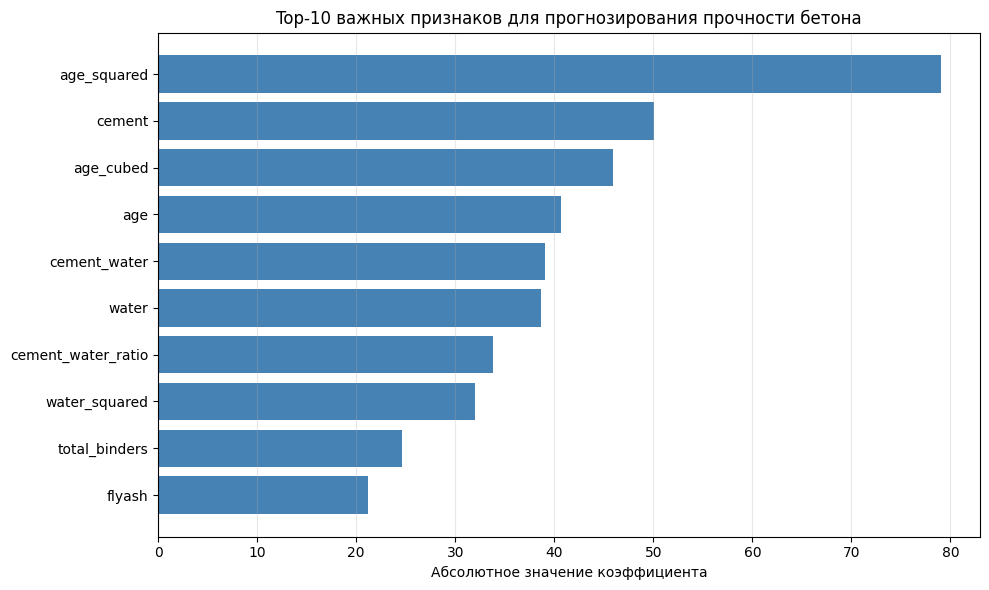

In [39]:
# визуализация результатов инженерии признаков для регрессии
fig, axes = plt.subplots(2, 2, figsize=(13, 10))

# 1. График предсказаний vs реальные значения (baseline)
axes[0, 0].scatter(y_test_concrete, y_pred_concrete_baseline, alpha=0.6, edgecolors='k', label='Baseline')
axes[0, 0].plot([y_test_concrete.min(), y_test_concrete.max()], 
                [y_test_concrete.min(), y_test_concrete.max()], 'r--', lw=2)
axes[0, 0].set_xlabel('Реальные значения')
axes[0, 0].set_ylabel('Предсказанные значения')
axes[0, 0].set_title(f'Baseline (R²={r2:.4f}, MAE={mae:.4f})')
axes[0, 0].grid(alpha=0.3)
axes[0, 0].legend()

# 2. График предсказаний vs реальные значения (с инженерией)
axes[0, 1].scatter(y_test_concrete_fe, y_pred_concrete_fe, alpha=0.6, edgecolors='k', color='green', label='С новыми признаками')
axes[0, 1].plot([y_test_concrete_fe.min(), y_test_concrete_fe.max()], 
                [y_test_concrete_fe.min(), y_test_concrete_fe.max()], 'r--', lw=2)
axes[0, 1].set_xlabel('Реальные значения')
axes[0, 1].set_ylabel('Предсказанные значения')
axes[0, 1].set_title(f'С новыми признаками (R²={r2_fe:.4f}, MAE={mae_fe:.4f})')
axes[0, 1].grid(alpha=0.3)
axes[0, 1].legend()

# 3. Сравнение метрик
metrics_names = ['MAE', 'RMSE', 'MSE', 'R²']
baseline_metrics = [mae, rmse, mse, r2]
fe_metrics = [mae_fe, rmse_fe, mse_fe, r2_fe]

x = np.arange(len(metrics_names))
width = 0.35

axes[1, 0].bar(x - width/2, baseline_metrics, width, label='Baseline', alpha=0.8)
axes[1, 0].bar(x + width/2, fe_metrics, width, label='С новыми признаками', alpha=0.8)
axes[1, 0].set_ylabel('Значение метрики')
axes[1, 0].set_title('Сравнение метрик качества')
axes[1, 0].set_xticks(x)
axes[1, 0].set_xticklabels(metrics_names)
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3, axis='y')

# 4. Процентное улучшение метрик
improvement = [((fe_metrics[i] - baseline_metrics[i]) / baseline_metrics[i] * 100) 
               if baseline_metrics[i] != 0 else 0 for i in range(len(metrics_names))]
colors = ['green' if x > 0 else 'red' for x in improvement]
axes[1, 1].bar(metrics_names, improvement, color=colors, alpha=0.7)
axes[1, 1].axhline(y=0, color='black', linestyle='-', linewidth=0.8)
axes[1, 1].set_ylabel('Улучшение (%)')
axes[1, 1].set_title('Процентное изменение метрик')
axes[1, 1].grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Важность признаков (коэффициенты линейной регрессии)
feature_importance_reg = np.abs(lin_reg_fe.coef_)
top_indices_reg = np.argsort(feature_importance_reg)[-10:]
top_features_reg = [X_concrete_fe_extended.columns[i] for i in top_indices_reg]
top_importance_reg = feature_importance_reg[top_indices_reg]

plt.figure(figsize=(10, 6))
plt.barh(top_features_reg, top_importance_reg, color='steelblue')
plt.xlabel('Абсолютное значение коэффициента')
plt.title('Top-10 важных признаков для прогнозирования прочности бетона')
plt.grid(alpha=0.3, axis='x')
plt.tight_layout()
plt.show()


*После создания новых признаков и обучения модели с ними видим сильное улучшение метрик по сравнению с baseline.*

### 3c-f. Формирование улучшенного бейзлайна

Выведем метрики для базовых и улучшенных моделей классификации и регрессии.

In [43]:
print("Метрики классификации:")
print(f"baseline:   Accuracy={accuracy:.4f}, F1={f1:.4f}, ROC-AUC={roc_auc:.4f}, PR-AUC={pr_auc:.4f}")
print(f"Гипотеза 2: Accuracy={acc_h2:.4f}, F1={f1_h2:.4f}, ROC-AUC={roc_auc_h2:.4f}, PR-AUC={pr_auc_h2:.4f}")
print(f"Гипотеза 5: Accuracy={acc_fe:.4f}, F1={f1_fe:.4f}, ROC-AUC={roc_auc_fe:.4f}, PR-AUC={pr_auc_fe:.4f}")

print("\nМетрики регрессии:")
print(f"baseline:    MAE={mae:.4f}, R²={r2:.4f}, MSE={mse:.4f}")
print(f"Гипотеза 2:  MAE={mae_h2:.4f}, R²={r2_h2:.4f}, MSE={mse_h2:.4f}")
print(f"Гипотеза 5:  MAE={mae_fe:.4f}, R²={r2_fe:.4f}, MSE={mse_fe:.4f}")

Метрики классификации:
baseline:   Accuracy=0.4603, F1=0.4240, ROC-AUC=0.4868, PR-AUC=0.4505
Гипотеза 2: Accuracy=0.5198, F1=0.4434, ROC-AUC=0.5251, PR-AUC=0.4103
Гипотеза 5: Accuracy=0.5646, F1=0.4965, ROC-AUC=0.6141, PR-AUC=0.4988

Метрики регрессии:
baseline:    MAE=8.2986, R²=0.5944, MSE=109.7508
Гипотеза 2:  MAE=8.2986, R²=0.5944, MSE=109.7508
Гипотеза 5:  MAE=5.7506, R²=0.7863, MSE=57.8247


### 3g. Выводы

Проанализировав различные гипотезы для улучшения качества моделей, можно сделать следующие выводы:

**Для логистической регрессии:**

После масштабирования признаков и замены пропусков медианным значением, удалось добиться небольшого улучшения метрик модели классификации. Однако, подбор гиперпараметра C не дал значительных улучшений. Создание новых признаков привело к улучшению всех метрик модели.

**Для линейной регрессии:**

Базовые подходы препроцессинга не дали значительного улучшения качества модели. Попытка удалить выбросы только ухудшила качество модели. Однако, создание новых признаков значительно улучшило все метрики модели регрессии.

## 4. Имплементация алгоритмов логистической и линейной регрессии

### 4a. Реализация алгоритмов

Реализация логистической регрессии

In [ ]:
class LogisticRegressionCustom:
    def __init__(self, lr=0.01, n_iter=1000, reg=0.0, class_weight=None):
        self.lr = lr
        self.n_iter = n_iter
        self.reg = reg
        self.class_weight = class_weight

    def _sigmoid(self, z):
        z = np.clip(z, -500, 500)
        return 1 / (1 + np.exp(-z))

    def _compute_sample_weights(self, y):
        if self.class_weight is None:
            return np.ones_like(y, dtype=float)
        y = y.astype(int)
        if self.class_weight == 'balanced':
            n_samples = len(y)
            classes, counts = np.unique(y, return_counts=True)
            weights = n_samples / (len(classes) * counts)
            weight_map = dict(zip(classes, weights))
            return np.array([weight_map[label] for label in y], dtype=float)
        elif isinstance(self.class_weight, dict):
            return np.array([self.class_weight[int(label)] for label in y], dtype=float)
        else:
            return np.ones_like(y, dtype=float)

    def fit(self, X, y):
        X = np.asarray(X, dtype=np.float64)
        y = np.asarray(y, dtype=np.float64).ravel()
        n_samples, n_features = X.shape

        X = np.hstack([np.ones((n_samples, 1)), X])
        self.w_ = np.zeros(n_features + 1)

        # вычисляем веса для каждого примера
        sample_weight = self._compute_sample_weights(y)
        # нормализуем веса, чтобы градиент не "взрывался"
        sample_weight = sample_weight / sample_weight.mean()

        for _ in range(self.n_iter):
            z = X @ self.w_
            p = self._sigmoid(z)
            error = p - y

            # Взвешенный градиент
            total_weight = sample_weight.sum()
            grad = (X.T @ (error * sample_weight)) / total_weight

            # L2-регуляризация (игнорируем bias)
            if self.reg > 0:
                reg_term = np.zeros_like(self.w_)
                reg_term[1:] = self.reg * self.w_[1:]  # не регуляризуем intercept
                grad += reg_term / total_weight

            self.w_ -= self.lr * grad

        return self

    def predict_proba(self, X):
        X = np.asarray(X, dtype=np.float64)
        X = np.hstack([np.ones((X.shape[0], 1)), X])
        prob = self._sigmoid(X @ self.w_)
        return np.vstack([1 - prob, prob]).T

    def predict(self, X, threshold=0.5):
        return (self.predict_proba(X)[:, 1] >= threshold).astype(int)

Реализация линейной регрессии

In [ ]:
class LinearRegressionCustom:
    def __init__(self):
        self.weights = None
        self.bias = 0.0

    def fit(self, X, y, lr=0.01, n_iter=1000):
        X = np.asarray(X, dtype=np.float64)
        y = np.asarray(y, dtype=np.float64).ravel()
        n_samples, n_features = X.shape

        # инициализация весов
        w = np.zeros(n_features)
        b = 0.0

        for _ in range(n_iter):
            y_pred = X @ w + b
            error = y_pred - y

            # градиенты
            dw = (2.0 / n_samples) * X.T @ error
            db = (2.0 / n_samples) * error.sum()

            # обновление
            w -= lr * dw
            b -= lr * db

        self.weights = w
        self.bias = b
        return self

    def predict(self, X):
        X = np.asarray(X, dtype=np.float64)
        return X @ self.weights + self.bias

### 4b. Обучение собственной реализации и оценка качества

Обучение проведем на данных без препроцессинга.

Подготовка данных для логистической и линейной регрессии.

In [17]:
# считываем данные заново для чистоты эксперимента
df_water_cu = pd.read_csv('water_potability.csv', na_values=['', '?', 'N/A', 'NA', 'None', ' ', '-'], index_col=0)
df_concrete_cu = pd.read_csv('concrete.csv', na_values=['', '?', 'N/A', 'NA', 'None', ' ', '-'])

# удаляем пропуски как и в начале
df_water_cu = df_water_cu.dropna()
df_concrete_cu = df_concrete_cu.dropna()

# разделяем на признаки и целевую переменную
X_water_cu = df_water_cu.drop('Potability', axis=1)
y_water_cu = df_water_cu['Potability']

X_concrete_cu = df_concrete_cu.iloc[:, :-1]
y_concrete_cu = df_concrete_cu.iloc[:, -1]


# разделение на train/test
X_train_water_cu, X_test_water_cu, y_train_water_cu, y_test_water_cu = train_test_split(
    X_water_cu, y_water_cu, test_size=0.3, random_state=42
)

X_train_concrete_cu, X_test_concrete_cu, y_train_concrete_cu, y_test_concrete_cu = train_test_split(
    X_concrete_cu, y_concrete_cu, test_size=0.3, random_state=42
)

Обучение и оценка качества собственной реализации логистической регрессии. Сравниваем с реализацией из sklearn.

In [18]:
# нужно выполнить масштабирование признаков, чтобы имплементация работала корректно, иначе выдаст f1=0
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_water_cu)
X_test_scaled = scaler.transform(X_test_water_cu)

# Обучение собственной реализации на baseline данных
lr_custom_clf_baseline = LogisticRegressionCustom(lr=0.01, n_iter=1000, reg=0.01, class_weight='balanced')
lr_custom_clf_baseline.fit(X_train_scaled, y_train_water_cu)
y_pred_custom_clf_baseline = lr_custom_clf_baseline.predict(X_test_scaled)
y_pred_proba_custom_clf_baseline = lr_custom_clf_baseline.predict_proba(X_test_scaled)[:, 1]


lr_sklearn_clf_baseline = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')
lr_sklearn_clf_baseline.fit(X_train_water_cu, y_train_water_cu)
y_pred_sklearn_clf_baseline = lr_sklearn_clf_baseline.predict(X_test_water_cu)
y_pred_proba_sklearn_clf_baseline = lr_sklearn_clf_baseline.predict_proba(X_test_water_cu)[:, 1]

# Метрики для классификации
acc_custom_baseline = accuracy_score(y_test_water_cu, y_pred_custom_clf_baseline)
f1_custom_baseline = f1_score(y_test_water_cu, y_pred_custom_clf_baseline, zero_division=0)
roc_auc_custom_baseline = roc_auc_score(y_test_water_cu, y_pred_proba_custom_clf_baseline)
pr_curve_custom_baseline = precision_recall_curve(y_test_water_cu, y_pred_proba_custom_clf_baseline)
pr_auc_custom_baseline = auc(pr_curve_custom_baseline[1], pr_curve_custom_baseline[0])

acc_sklearn_baseline = accuracy_score(y_test_water_cu, y_pred_sklearn_clf_baseline)
f1_sklearn_baseline = f1_score(y_test_water_cu, y_pred_sklearn_clf_baseline, zero_division=0)
roc_auc_sklearn_baseline = roc_auc_score(y_test_water_cu, y_pred_proba_sklearn_clf_baseline)
pr_curve_sklearn_baseline = precision_recall_curve(y_test_water_cu, y_pred_proba_sklearn_clf_baseline)
pr_auc_sklearn_baseline = auc(pr_curve_sklearn_baseline[1], pr_curve_sklearn_baseline[0])

print("Классификация (собственная реализация - baseline):")
print(f"  Accuracy:  {acc_custom_baseline:.4f}")
print(f"  F1-score:  {f1_custom_baseline:.4f}")
print(f"  ROC-AUC:   {roc_auc_custom_baseline:.4f}")
print(f"  PR-AUC:    {pr_auc_custom_baseline:.4f}")

print("\nКлассификация (sklearn реализация - baseline):")
print(f"  Accuracy:  {acc_sklearn_baseline:.4f}")
print(f"  F1-score:  {f1_sklearn_baseline:.4f}")
print(f"  ROC-AUC:   {roc_auc_sklearn_baseline:.4f}")
print(f"  PR-AUC:    {pr_auc_sklearn_baseline:.4f}")

Классификация (собственная реализация - baseline):
  Accuracy:  0.4719
  F1-score:  0.4273
  ROC-AUC:   0.4717
  PR-AUC:    0.4241

Классификация (sklearn реализация - baseline):
  Accuracy:  0.4603
  F1-score:  0.4240
  ROC-AUC:   0.4868
  PR-AUC:    0.4505


*Метрики почти совпали. Это говорит о том, что моя реализация работает корректно.*

Обучение и оценка качества собственной реализации линейной регрессии. Сравниваем с реализацией из sklearn.

In [19]:
# без масштабирования признаков имплементация не работает корректно, пишет, что входные данные содержат NaN
# либо масштабирование, либо реализовать простое решение через np.linalg.inv
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_concrete_cu)
X_test_scaled = scaler.transform(X_test_concrete_cu)

lin_reg_custom_baseline = LinearRegressionCustom()
lin_reg_custom_baseline.fit(X_train_scaled, y_train_concrete_cu)
y_pred_custom_reg_baseline = lin_reg_custom_baseline.predict(X_test_scaled)

lin_reg_sklearn_baseline = LinearRegression()
lin_reg_sklearn_baseline.fit(X_train_concrete_cu, y_train_concrete_cu)
y_pred_sklearn_reg_baseline = lin_reg_sklearn_baseline.predict(X_test_concrete_cu) 

# Метрики для регрессии
mae_custom_baseline = mean_absolute_error(y_test_concrete_cu, y_pred_custom_reg_baseline)
r2_custom_baseline = r2_score(y_test_concrete_cu, y_pred_custom_reg_baseline)
mse_custom_baseline = mean_squared_error(y_test_concrete_cu, y_pred_custom_reg_baseline)

mae_sklearn_baseline = mean_absolute_error(y_test_concrete_cu, y_pred_sklearn_reg_baseline)
r2_sklearn_baseline = r2_score(y_test_concrete_cu, y_pred_sklearn_reg_baseline)
mse_sklearn_baseline = mean_squared_error(y_test_concrete_cu, y_pred_sklearn_reg_baseline)

print("\nРегрессия (собственная реализация - baseline):")
print(f"  MAE:  {mae_custom_baseline:.4f}")
print(f"  R²:   {r2_custom_baseline:.4f}")
print(f"  MSE:  {mse_custom_baseline:.4f}")

print("\nРегрессия (sklearn реализация - baseline):")
print(f"  MAE:  {mae_sklearn_baseline:.4f}")
print(f"  R²:   {r2_sklearn_baseline:.4f}")
print(f"  MSE:  {mse_sklearn_baseline:.4f}")


Регрессия (собственная реализация - baseline):
  MAE:  8.3545
  R²:   0.5989
  MSE:  108.5338

Регрессия (sklearn реализация - baseline):
  MAE:  8.2986
  R²:   0.5944
  MSE:  109.7508


*Реализация линейно регрессии показала такие же метрики, значит модель работает корректно.*

### 4c. Обучение собственной реализации на улучшенных данных и оценка качества

Препроцессинг данных для классификации.

In [ ]:
# загрузим данные заново для инженерии признаков
df_water_fe = pd.read_csv('water_potability.csv', na_values=['', '?', 'N/A', 'NA', 'None', ' ', '-'], index_col=0)

# заполнение пропусков медианой по классам
df_water_fe['ph'] = df_water_fe.groupby('Potability')['ph'].transform(lambda x: x.fillna(x.median()))
df_water_fe['Sulfate'] = df_water_fe.groupby('Potability')['Sulfate'].transform(lambda x: x.fillna(x.median()))
df_water_fe['Trihalomethanes'] = df_water_fe.groupby('Potability')['Trihalomethanes'].transform(lambda x: x.fillna(x.median()))

# разделяем на признаки и целевую переменную
X_water_fe = df_water_fe.drop('Potability', axis=1)
y_water_fe = df_water_fe['Potability']

# создание новых признаков
X_water_fe_extended = X_water_fe.copy()

# 1. взаимодействие признаков
X_water_fe_extended['ph_sulfate'] = X_water_fe_extended['ph'] * X_water_fe_extended['Sulfate']
X_water_fe_extended['ph_turbidity'] = X_water_fe_extended['ph'] * X_water_fe_extended['Turbidity']
X_water_fe_extended['conductivity_sulfate'] = X_water_fe_extended['Conductivity'] * X_water_fe_extended['Sulfate']

# 2. полиномиальные признаки
X_water_fe_extended['ph_squared'] = X_water_fe_extended['ph'] ** 2
X_water_fe_extended['conductivity_squared'] = X_water_fe_extended['Conductivity'] ** 2
X_water_fe_extended['organic_carbon_squared'] = X_water_fe_extended['Organic_carbon'] ** 2

# 3. статистические признаки
X_water_fe_extended['feature_mean'] = X_water_fe_extended.mean(axis=1)
X_water_fe_extended['feature_std'] = X_water_fe_extended.std(axis=1)
X_water_fe_extended['feature_max'] = X_water_fe_extended.max(axis=1)
X_water_fe_extended['feature_min'] = X_water_fe_extended.min(axis=1)

# 4. отношения между признаками (безопасность - деление на ноль)
X_water_fe_extended['ph_conductivity_ratio'] = X_water_fe_extended['ph'] / (X_water_fe_extended['Conductivity'] + 1e-6)
X_water_fe_extended['sulfate_turbidity_ratio'] = X_water_fe_extended['Sulfate'] / (X_water_fe_extended['Turbidity'] + 1e-6)

print(f"Исходное количество признаков: {X_water_fe.shape[1]}")
print(f"Количество признаков после инженерии: {X_water_fe_extended.shape[1]}")
print(f"\nНовые признаки: {list(X_water_fe_extended.columns[X_water_fe.shape[1]:])}")


Обучение и оценка качества собственной модели логистической регрессии на улучшенных данных. Сравниваем с реализацией из sklearn.

In [46]:
# разделение на train/test с новыми признаками
X_train_water_fe, X_test_water_fe, y_train_water_fe, y_test_water_fe = train_test_split(
    X_water_fe_extended, y_water_fe, test_size=0.3, random_state=42
)

# стандартизация признаков
scaler_fe = StandardScaler()
X_train_water_fe_scaled = scaler_fe.fit_transform(X_train_water_fe)
X_test_water_fe_scaled = scaler_fe.transform(X_test_water_fe)

lr_custom_clf_improved = LogisticRegressionCustom(lr=0.01, n_iter=1000, reg=0.01, class_weight='balanced')
lr_custom_clf_improved.fit(X_train_water_fe_scaled, y_train_water_fe)
y_pred_custom_clf_improved = lr_custom_clf_improved.predict(X_test_water_fe_scaled)
y_pred_proba_custom_clf_improved = lr_custom_clf_improved.predict_proba(X_test_water_fe_scaled)[:, 1]

# обучение логистической регрессии с новыми признаками
lr_clf_fe = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')
lr_clf_fe.fit(X_train_water_fe_scaled, y_train_water_fe)
y_pred_water_fe = lr_clf_fe.predict(X_test_water_fe_scaled)
y_pred_proba_water_fe = lr_clf_fe.predict_proba(X_test_water_fe_scaled)[:, 1]

# вычисление метрик
acc_custom_improved = accuracy_score(y_test_water_fe, y_pred_custom_clf_improved)
f1_custom_improved = f1_score(y_test_water_fe, y_pred_custom_clf_improved, zero_division=0)
roc_auc_custom_improved = roc_auc_score(y_test_water_fe, y_pred_proba_custom_clf_improved)
pr_curve_custom_improved = precision_recall_curve(y_test_water_fe, y_pred_proba_custom_clf_improved)
pr_auc_custom_improved = auc(pr_curve_custom_improved[1], pr_curve_custom_improved[0])
precision_custom_improved = precision_score(y_test_water_fe, y_pred_custom_clf_improved, zero_division=0)
recall_custom_improved = recall_score(y_test_water_fe, y_pred_custom_clf_improved, zero_division=0)

acc_fe = accuracy_score(y_test_water_fe, y_pred_water_fe)
f1_fe = f1_score(y_test_water_fe, y_pred_water_fe, zero_division=0)
roc_auc_fe = roc_auc_score(y_test_water_fe, y_pred_proba_water_fe)
pr_curve_fe = precision_recall_curve(y_test_water_fe, y_pred_proba_water_fe)
pr_auc_fe = auc(pr_curve_fe[1], pr_curve_fe[0])
precision_fe = precision_score(y_test_water_fe, y_pred_water_fe, zero_division=0)
recall_fe = recall_score(y_test_water_fe, y_pred_water_fe, zero_division=0)

print(f"Метрики качества (sklearn):")
print(f"  Accuracy:  {acc_fe:.4f}")
print(f"  Precision: {precision_fe:.4f}")
print(f"  Recall:    {recall_fe:.4f}")
print(f"  F1-score:  {f1_fe:.4f}")
print(f"  ROC-AUC:   {roc_auc_fe:.4f}")
print(f"  PR-AUC:    {pr_auc_fe:.4f}")

print(f"\nМетрики качества (имплементация):")
print(f"  Accuracy:  {acc_custom_improved:.4f}")
print(f"  Precision: {precision_custom_improved:.4f}")
print(f"  Recall:    {recall_custom_improved:.4f}")
print(f"  F1-score:  {f1_custom_improved:.4f}")
print(f"  ROC-AUC:   {roc_auc_custom_improved:.4f}")
print(f"  PR-AUC:    {pr_auc_custom_improved:.4f}")


Метрики качества (sklearn):
  Accuracy:  0.5646
  Precision: 0.4360
  Recall:    0.5765
  F1-score:  0.4965
  ROC-AUC:   0.6141
  PR-AUC:    0.4988

Метрики качества (имплементация):
  Accuracy:  0.5310
  Precision: 0.4025
  Recall:    0.5355
  F1-score:  0.4596
  ROC-AUC:   0.5290
  PR-AUC:    0.4124


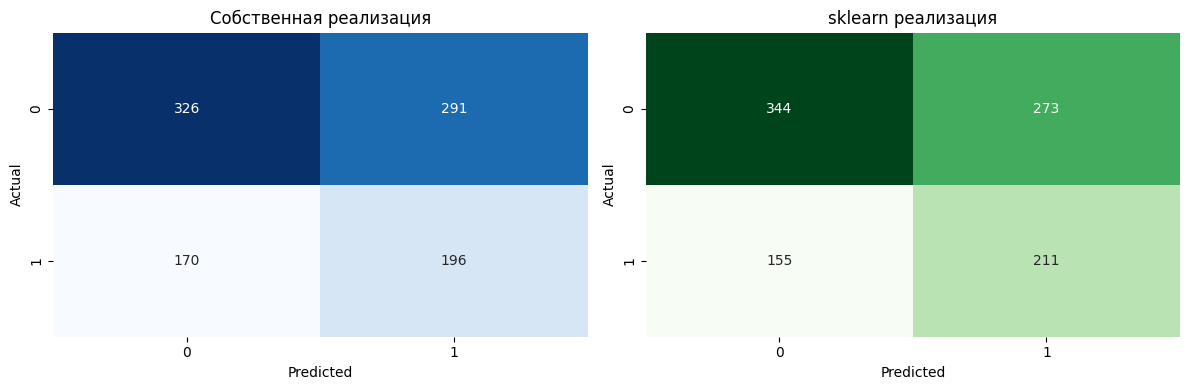

In [47]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Матрица ошибок для собственной реализации классификации
cm_custom = confusion_matrix(y_test_water_fe, y_pred_custom_clf_improved)
sns.heatmap(cm_custom, annot=True, fmt='d', ax=axes[0], cmap='Blues', cbar=False)
axes[0].set_title(f'Собственная реализация')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Матрица ошибок для sklearn
cm_sklearn = confusion_matrix(y_test_water_fe, y_pred_water_fe)
sns.heatmap(cm_sklearn, annot=True, fmt='d', ax=axes[1], cmap='Greens', cbar=False)
axes[1].set_title(f'sklearn реализация')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

*Метрики почти совпадают, значит реализация корректна.*

Препроцессинг данных для линейной регрессии.

In [ ]:
# загрузим данные заново для инженерии признаков
df_concrete_fe = pd.read_csv('concrete.csv', na_values=['', '?', 'N/A', 'NA', 'None', ' ', '-'])

# заполнение пропусков для регрессии
df_concrete_fe = df_concrete_fe.fillna(df_concrete_fe.median())

# отделяем признаки и целевую переменную
X_concrete_fe = df_concrete_fe.iloc[:, :-1]
y_concrete_fe = df_concrete_fe.iloc[:, -1]

# создание новых признаков
X_concrete_fe_extended = X_concrete_fe.copy()

# 1. взаимодействие признаков (основные компоненты смеси)
X_concrete_fe_extended['cement_water'] = X_concrete_fe_extended['cement'] * X_concrete_fe_extended['water']
X_concrete_fe_extended['cement_slag'] = X_concrete_fe_extended['cement'] * X_concrete_fe_extended['slag']
X_concrete_fe_extended['cement_ash'] = X_concrete_fe_extended['cement'] * X_concrete_fe_extended['flyash']
X_concrete_fe_extended['slag_ash'] = X_concrete_fe_extended['slag'] * X_concrete_fe_extended['flyash']
X_concrete_fe_extended['water_superplasticizer'] = X_concrete_fe_extended['water'] * X_concrete_fe_extended['superplasticizer']
# 2. полиномиальные признаки
X_concrete_fe_extended['cement_squared'] = X_concrete_fe_extended['cement'] ** 2
X_concrete_fe_extended['water_squared'] = X_concrete_fe_extended['water'] ** 2
X_concrete_fe_extended['slag_squared'] = X_concrete_fe_extended['slag'] ** 2
X_concrete_fe_extended['age_squared'] = X_concrete_fe_extended['age'] ** 2
X_concrete_fe_extended['age_cubed'] = X_concrete_fe_extended['age'] ** 3

# 3. отношения между признаками
X_concrete_fe_extended['cement_water_ratio'] = X_concrete_fe_extended['cement'] / (X_concrete_fe_extended['water'] + 1e-6)
X_concrete_fe_extended['total_binders'] = (X_concrete_fe_extended['cement'] + 
                                            X_concrete_fe_extended['slag'] + 
                                            X_concrete_fe_extended['flyash'])
X_concrete_fe_extended['binder_water_ratio'] = X_concrete_fe_extended['total_binders'] / (X_concrete_fe_extended['water'] + 1e-6)

# 4. статистические признаки
X_concrete_fe_extended['component_mean'] = X_concrete_fe_extended[['cement', 'slag', 'flyash', 'water']].mean(axis=1)
X_concrete_fe_extended['component_max'] = X_concrete_fe_extended[['cement', 'slag', 'flyash', 'water']].max(axis=1)

print(f"Исходное количество признаков: {X_concrete_fe.shape[1]}")
print(f"Количество признаков после добавления: {X_concrete_fe_extended.shape[1]}")
print(f"\nНовые признаки: {list(X_concrete_fe_extended.columns[X_concrete_fe.shape[1]:])}")


Обучение и оценка качества собственной реализации линейной регрессии на улучшенных данных. Сравниваем с реализацией из sklearn.

In [44]:
# разделение на train/test с новыми признаками
X_train_concrete_fe, X_test_concrete_fe, y_train_concrete_fe, y_test_concrete_fe = train_test_split(
    X_concrete_fe_extended, y_concrete_fe, test_size=0.3, random_state=42
)

# стандартизация признаков
scaler_concrete_fe = StandardScaler()
X_train_concrete_fe_scaled = scaler_concrete_fe.fit_transform(X_train_concrete_fe)
X_test_concrete_fe_scaled = scaler_concrete_fe.transform(X_test_concrete_fe)

# обучение имплементации с новыми признаками
lin_reg_custom_improved = LinearRegressionCustom()
lin_reg_custom_improved.fit(X_train_concrete_fe_scaled, y_train_concrete_fe)
y_pred_concrete_fe_custom = lin_reg_custom_improved.predict(X_test_concrete_fe_scaled)

# обучение линейной регрессии с новыми признаками
lin_reg_sklearn_imp = LinearRegression()
lin_reg_sklearn_imp.fit(X_train_concrete_fe_scaled, y_train_concrete_fe)
y_pred_concrete_fe_imp = lin_reg_sklearn_imp.predict(X_test_concrete_fe_scaled)


# вычисление метрик
mae_custom_improved = mean_absolute_error(y_test_concrete_fe, y_pred_concrete_fe_custom)
rmse_custom_improved = np.sqrt(mean_squared_error(y_test_concrete_fe, y_pred_concrete_fe_custom))
mse_custom_improved = mean_squared_error(y_test_concrete_fe, y_pred_concrete_fe_custom)
r2_custom_improved = r2_score(y_test_concrete_fe, y_pred_concrete_fe_custom)

mae_sklearn_improved = mean_absolute_error(y_test_concrete_fe, y_pred_concrete_fe_imp)
rmse_sklearn_improved = np.sqrt(mean_squared_error(y_test_concrete_fe, y_pred_concrete_fe_imp))
mse_sklearn_improved = mean_squared_error(y_test_concrete_fe, y_pred_concrete_fe_imp)
r2_sklearn_improved = r2_score(y_test_concrete_fe, y_pred_concrete_fe_imp)

print(f"Метрики качества (sklearn):")
print(f"  MAE:   {mae_sklearn_improved:.4f}")
print(f"  RMSE:  {rmse_sklearn_improved:.4f}")
print(f"  MSE:   {mse_sklearn_improved:.4f}")
print(f"  R²:    {r2_sklearn_improved:.4f}")

print(f"\nМетрики качества (имплементация):")
print(f"  MAE:   {mae_custom_improved:.4f}")
print(f"  RMSE:  {rmse_custom_improved:.4f}")
print(f"  MSE:   {mse_custom_improved:.4f}")
print(f"  R²:    {r2_custom_improved:.4f}")


Метрики качества (sklearn):
  MAE:   5.7506
  RMSE:  7.6043
  MSE:   57.8247
  R²:    0.7863

Метрики качества (имплементация):
  MAE:   6.8221
  RMSE:  8.8356
  MSE:   78.0686
  R²:    0.7115


*Метрики имплементации не совпадают с метриками sklearn. Это связано с погрешностью, которая вероятно присутствует в реализации модели и количеством признаков в наборе (у нас тут применен фича инжениринг). Если сравнивать с метриками baseline, то улучшение присутсвует, это говорит о том, что модель работает корректно.*

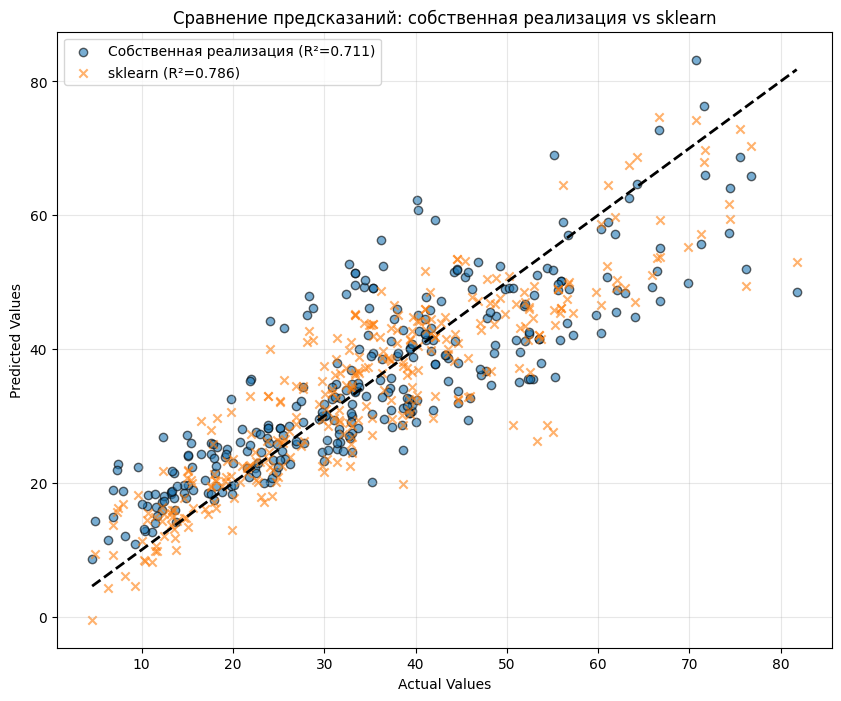

In [45]:
plt.figure(figsize=(10, 8))
plt.scatter(y_test_concrete_fe, y_pred_concrete_fe_custom, alpha=0.6, edgecolors='k', 
            label=f'Собственная реализация (R²={r2_custom_improved:.3f})')
plt.scatter(y_test_concrete_fe, y_pred_concrete_fe_imp, alpha=0.6, edgecolors='r', marker='x',
            label=f'sklearn (R²={r2_sklearn_improved:.3f})')
plt.plot([y_test_concrete_fe.min(), y_test_concrete_fe.max()], 
         [y_test_concrete_fe.min(), y_test_concrete_fe.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Сравнение предсказаний: собственная реализация vs sklearn')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

### 4j. Выводы

В данной лабораторной работе были реализованы алгоритмы логистической и линейной регрессии с нуля, а также проведено сравнение их эффективности с реализациями из библиотеки sklearn.

Модель логистической регрессии обучается с помощью градиентного спуска, минимизируя логистическую функцию потерь (кросс-энтропию) с поддержкой L2-регуляризации и взвешивания классов (class_weight='balanced'). Используется сигмоидная функция для преобразования линейного предсказания в вероятность принадлежности к положительному классу.

Модель линейной регрессииобучается с помощью градиентного спуска, минимизируя среднеквадратичную ошибку (MSE). На каждой итерации вычисляются градиенты по весам и смещению, и параметры обновляются с фиксированным шагом (lr). Реализация не требует обращения матриц и масштабируется на большие данные.

В ходе работы за счет создания новых признаков удалось получить улучшенные метрики для обеих моделей по сравнению с baseline. Собственные реализации показали метрики, близкие к sklearn, что подтверждает корректность их работы.